In [2]:
import pandas as pd

In [4]:
!pip install -U spacy

In [3]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English


C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip install wordcloud

In [4]:
df=pd.read_csv("fake_job_postings.csv")

In [5]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
columns_to_drop=['job_id','has_company_logo','employment_type','telecommuting','has_questions','salary_range']
df.drop(columns=columns_to_drop,inplace=True)

In [7]:
df.head(40)

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,Accounting Clerk,"US, MD,",NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,NaN,NaN,NaN,NaN,0
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,Mid-Senior level,Master's Degree,Online Media,Management,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,NaN,NaN,NaN,NaN,0
8,HP BSM SME,"US, FL, Pensacola",NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,Associate,NaN,Information Technology and Services,NaN,0
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [8]:
df.fillna('',inplace=True)

In [9]:
df.head(20)

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,Accounting Clerk,"US, MD,",,,Job OverviewApex is an environmental consultin...,,,,,,,0
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,Mid-Senior level,Master's Degree,Online Media,Management,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,,,,,0
8,HP BSM SME,"US, FL, Pensacola",,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,,Associate,,Information Technology and Services,,0
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,,Entry level,High School or equivalent,Financial Services,Customer Service,0


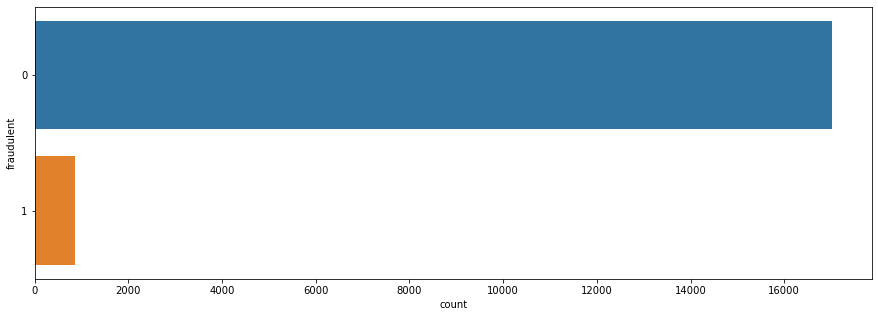

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()

In [11]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [12]:
exp=dict(df.required_experience.value_counts())
del exp['']

In [13]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

In [14]:
def split(location):
    l=location.split(',')
    return l[0]
df['country']=df.location.apply(split)

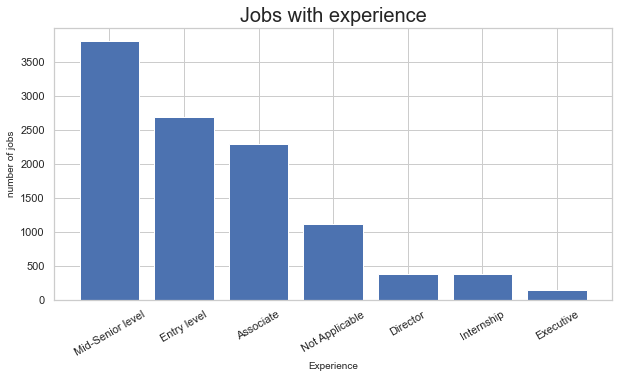

In [15]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(exp.keys(),exp.values())
plt.title("Jobs with experience",size=20)
plt.xlabel('Experience',size=10)
plt.ylabel("number of jobs",size=10)
plt.xticks(rotation=30)
plt.show()

In [16]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [17]:
#Country with number of jobs
countr=dict(df.country.value_counts()[:15])
del countr['']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80,
 'HK': 77}

Text(0.5, 0, 'countries')

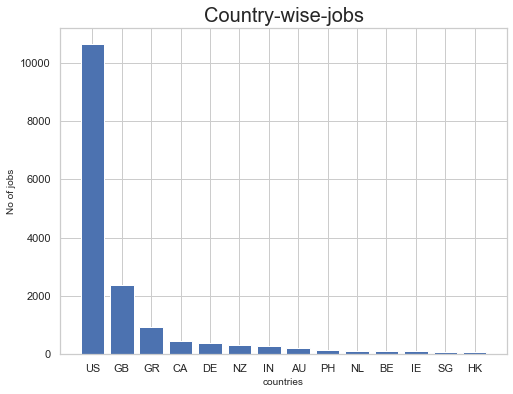

In [18]:
#Country wise jobs
plt.figure(figsize=(8,6))
plt.title('Country-wise-jobs',size=20)
plt.bar(countr.keys(),countr.values())
plt.ylabel('No of jobs',size=10)
plt.xlabel('countries',size=10)

In [19]:
#data of required education
edu=dict(df.required_education.value_counts()[:7])
del edu['']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

Text(0.5, 0, 'Education')

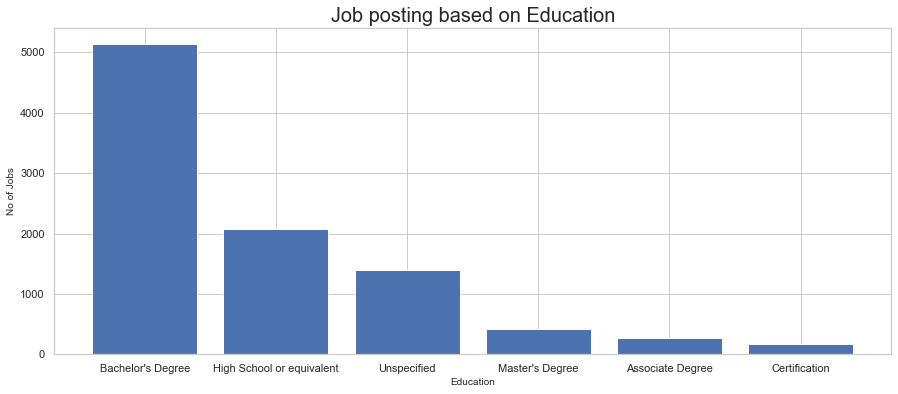

In [20]:
##Graph of job posting basis on education

plt.figure(figsize=(15,6))
plt.title("Job posting based on Education",size=20)
plt.bar(edu.keys(),edu.values())
plt.ylabel('No of Jobs',size=10)
plt.xlabel('Education',size=10)

In [21]:
##jobs that are not fake
print(df[df.fraudulent==0].title.value_counts()[:15])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Graduates: English Teacher Abroad                      57
Product Manager                                        47
Marketing Manager                                      45
Office Manager                                         44
Name: title, dtype: int64


In [22]:
##jobs that are fake
print(df[df.fraudulent==1].title.value_counts()[:15])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Agency Sales Managers $150-$175,000/yr                                   9
 Payroll Data Entry Clerk Position - Earn $100-$200 Daily                6
Lawn and Maintenance Cont

In [23]:
columns_to_drop = ['title', 'location', 'department', 'company_profile', 'description',
                   'requirements', 'benefits', 'required_experience', 'required_education',
                   'industry', 'function', 'country']

df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + \
             df['requirements'] + ' ' + df['benefits']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)


In [25]:
real_jobs_text=df[df.fraudulent==0].text
scam_jobs_text=df[df.fraudulent==1].text

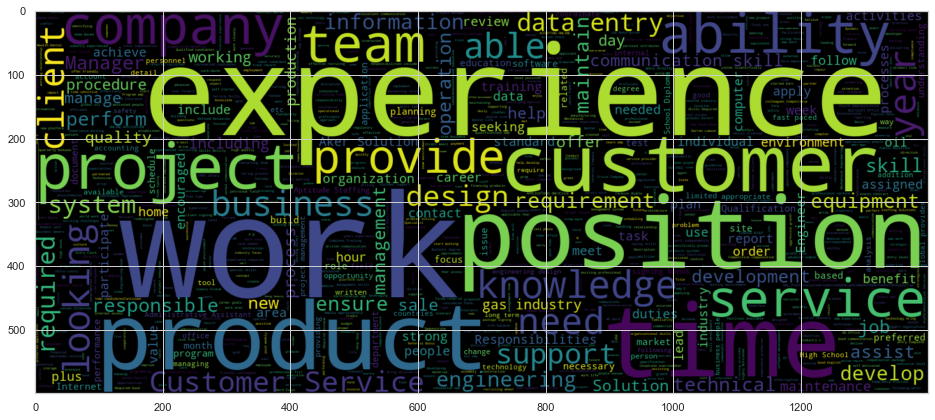

In [27]:
#World cloud for scam jobs
STOPWORDS=spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc=WordCloud(min_font_size=4,max_words=3000,width=1400,height=600,stopwords=STOPWORDS).generate(str(" ".join(scam_jobs_text)))
plt.imshow(wc,interpolation='bilinear')

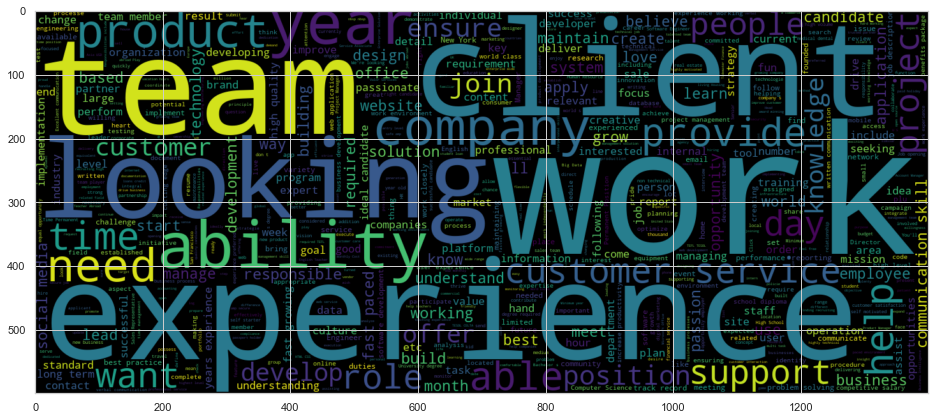

In [28]:
STOPWORDS=spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc=WordCloud(min_font_size=4,max_words=3000,width=1400,height=600,stopwords=STOPWORDS).generate(str(" ".join(real_jobs_text)))
plt.imshow(wc,interpolation='bilinear')

In [97]:
!pip install spacy && python -m spacy download en


     ---------------------------------------- 12.8/12.8 MB 9.0 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
#list of punctation marks
punctuation=string.punctuation
#list of stop words
nlp=spacy.load("en_core_web_sm")
stop_words=spacy.lang.en.stop_words.STOP_WORDS
#loading english tokenizer,parser,tagger,NER, and word vectors
parser=English()
#creating tokens function
def spacy_tokenizer(sentence):
    tokens=parser(sentence)
    tokens=[word.lemma_.lower().strip() if word.lemma_!="-PRON-" else word.lower_ for word in tokens]
    tokens=[word for word in tokens if word not in stop_words and word not in punctations]
    return tokens

class predictors(TransformerMixin):
    def transform(self,X,**transform_params):
        return self
    def get_params(self,deep=True):
        return {}
    
    
def clean_text(text):
    return text.strip().lower()

In [30]:
df['text']=df['text'].apply(clean_text)

In [31]:
cv=TfidfVectorizer(max_features=100)
x=cv.fit_transform(df['text'])
df1=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())

df.drop(["text"], axis=1, inplace=True)

main_df=pd.concat([df1,df],axis=1)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,...,0.000000,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,...,0.000000,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,...,0.000000,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,...,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,...,0.000000,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,0


In [33]:
Y=main_df.iloc[:,-1]
X=main_df.iloc[:,:-1]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
print(X_test.shape)
print(y_test.shape)

(5364, 100)
(5364,)


In [36]:
##Random Forest classifer
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model=rfc.fit(X_train,y_train)

In [39]:
pred=rfc.predict(X_test)
score=accuracy_score(y_test,pred)
score

0.9714765100671141

In [43]:
##support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [44]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9524608501118568


In [45]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Train the neural network classifier
nn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9791200596569725


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5109
           1       1.00      0.40      0.57       255

    accuracy                           0.97      5364
   macro avg       0.99      0.70      0.78      5364
weighted avg       0.97      0.97      0.97      5364



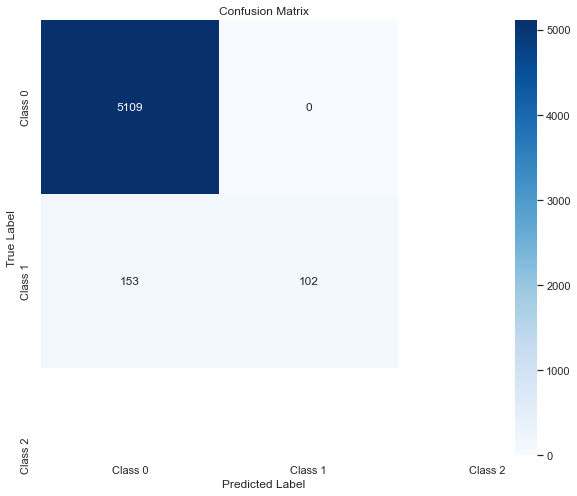

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you already have y_test and pred
# Calculate confusion matrix
cm = confusion_matrix(y_test, pred)

# Display classification report
print("Classification report\n")
print(classification_report(y_test, pred))

# Display confusion matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
